In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_json("dataset/train.jsonl",lines=True)[["comment","rating_int"]]


In [10]:
df_train

,comment,rating_int
0,"Vsetko je pekne a krasne, ked si odmyslime hl...",2
1,Zbytočne veľa nechutností (nie som žiadna roz...,2
2,ďalší výborný Almodóvar. Krásne precítené vní...,5
3,Diky hercum by mohl mit serial dobry potencia...,1
4,"Podobné filmy dokazujú, že aj romantické film...",4
...,...,...
24995,"Zábava to bola skvelá, ale chcem vidieť babu,...",4
24996,Nudne spracovaný príbeh s dosť naivným scenár...,2
24997,2 hodiny cakania na skvele rozuzlenie....a ko...,3
24998,"ide o lepsiu zalezitost nez je jednotka, no s...",2


# Frequency exploration

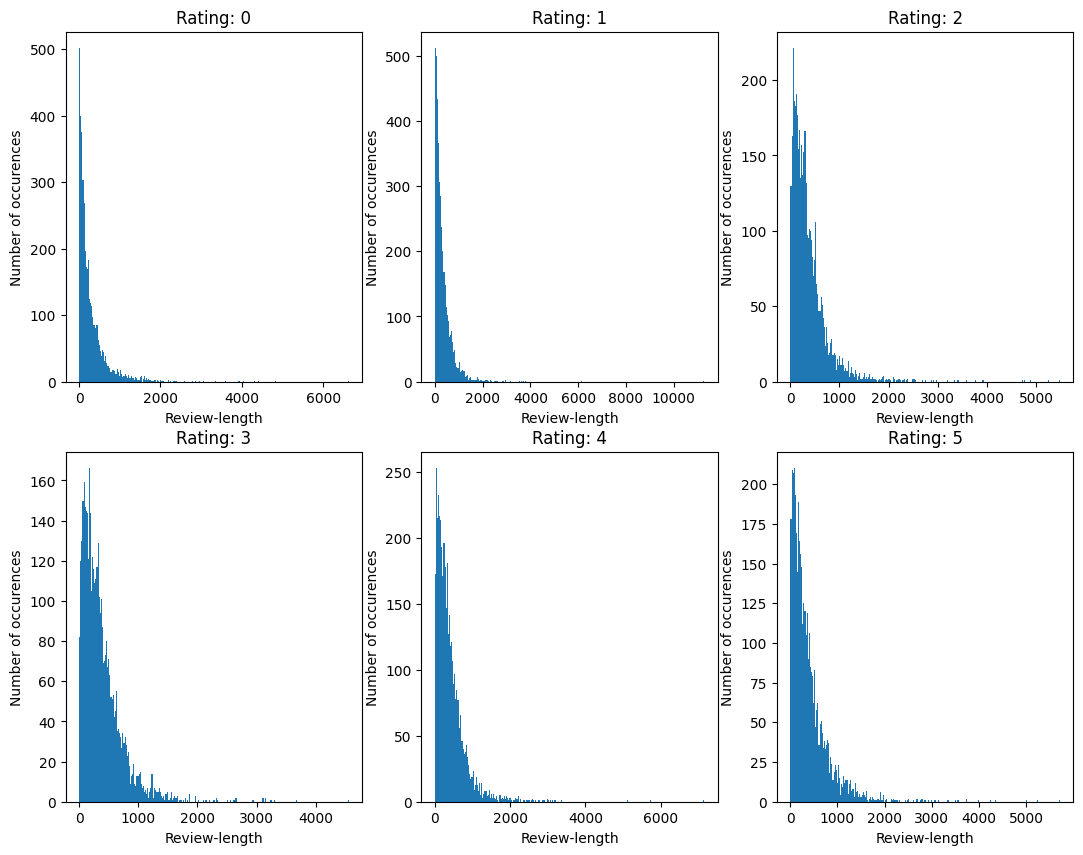

In [27]:
fig, axs = plt.subplots(2,3,figsize=(13,10))
for rating in df_train["rating_int"].unique():
    tmp = df_train[df_train["rating_int"]==rating]
    axs[rating//3,rating%3].hist(tmp["comment"].str.len(),bins=250)
    axs[rating//3,rating%3].set_title(f"Rating: {rating}")
    axs[rating//3,rating%3].set(xlabel="Review-length",ylabel="Number of occurences")


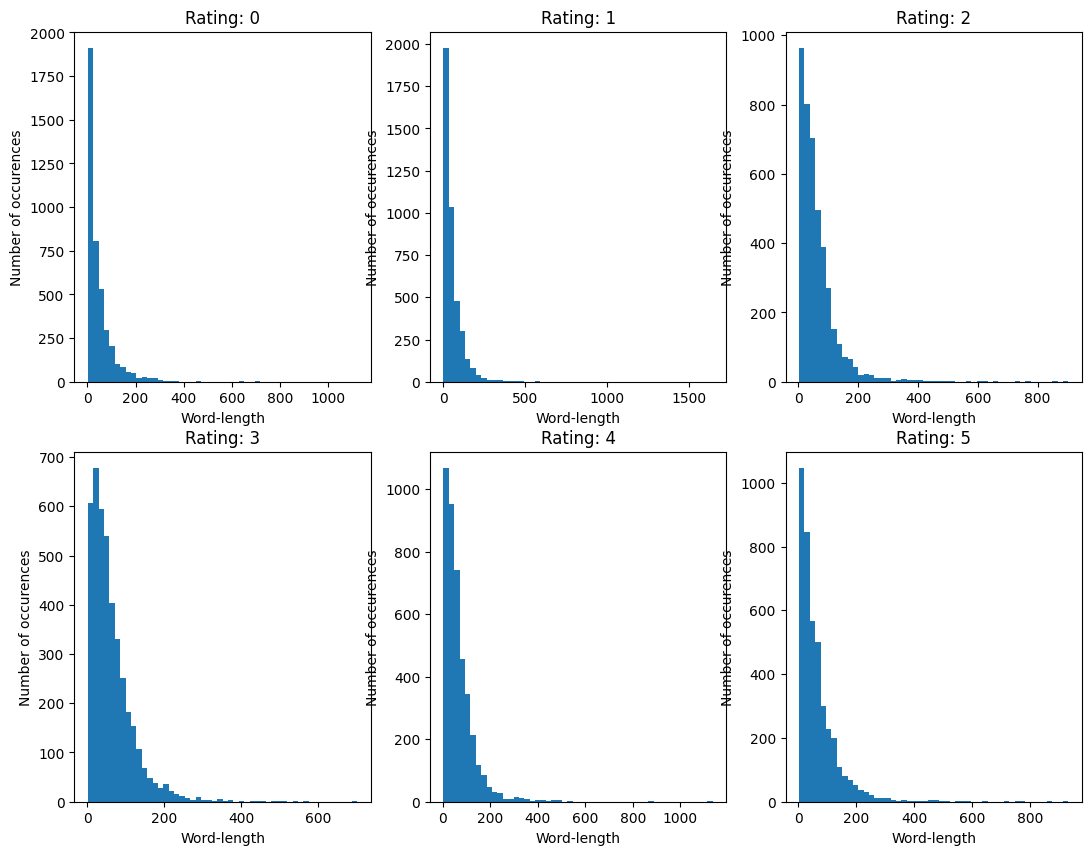

In [32]:
fig, axs = plt.subplots(2,3,figsize=(13,10))
for rating in df_train["rating_int"].unique():
    tmp = df_train[df_train["rating_int"]==rating]
    tmp_count = tmp["comment"].apply(lambda x : len(x.split(" ")))
    axs[rating//3,rating%3].hist(tmp_count,bins=50)
    axs[rating//3,rating%3].set_title(f"Rating: {rating}")
    axs[rating//3,rating%3].set(xlabel="Word-length",ylabel="Number of occurences")


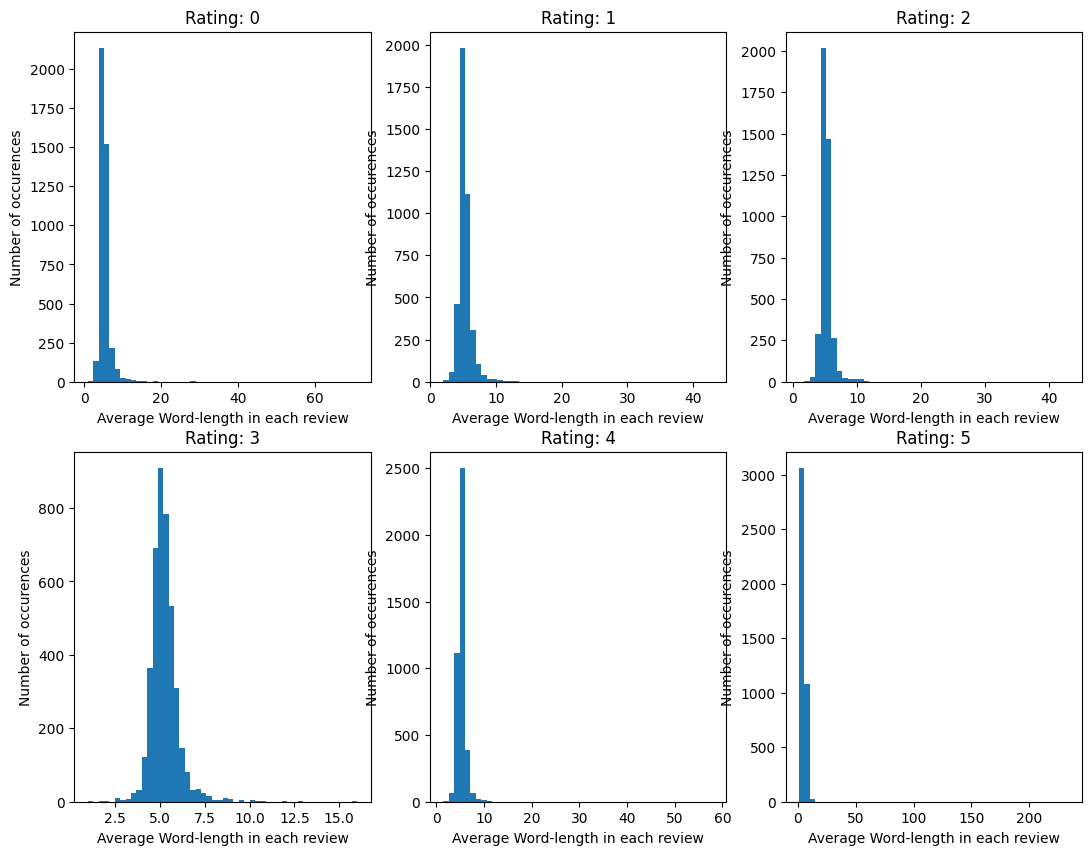

In [33]:
fig, axs = plt.subplots(2,3,figsize=(13,10))
for rating in df_train["rating_int"].unique():
    tmp = df_train[df_train["rating_int"]==rating]
    axs[rating//3,rating%3].hist(tmp["comment"].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x : np.mean(x)),bins=50)
    axs[rating//3,rating%3].set_title(f"Rating: {rating}")
    axs[rating//3,rating%3].set(xlabel="Average Word-length in each review",ylabel="Number of occurences")


## Ngram exploration

In [42]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns


In [37]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

c:\Users\max\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\max\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\max\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\max\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be

<AxesSubplot:>

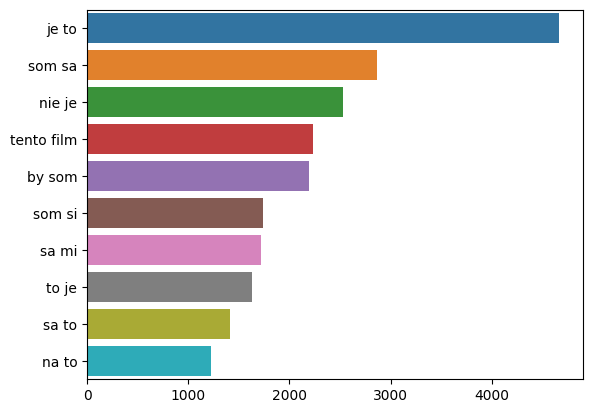

In [44]:
top_2grams = get_top_ngram(df_train["comment"],2)
x,y = map(list,zip(*top_2grams))
sns.barplot(x=y,y=x)


c:\Users\max\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\max\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\max\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\max\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be

<AxesSubplot:>

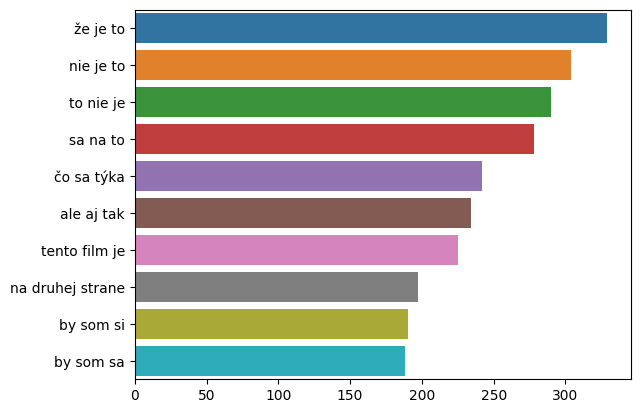

In [45]:
top_2grams = get_top_ngram(df_train["comment"],3)
x,y = map(list,zip(*top_2grams))
sns.barplot(x=y,y=x)


# Stopwords exploration
CC https://github.com/Alir3z4/stop-words/blob/master/slovak.txt

In [65]:
import nltk
from nltk.corpus import stopwords
 
nltk.download('stopwords')
stop=set(stopwords.words('slovak'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\max\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [66]:
corpus=[]
new= df_train['comment'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

c:\Users\max\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\max\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\max\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:>

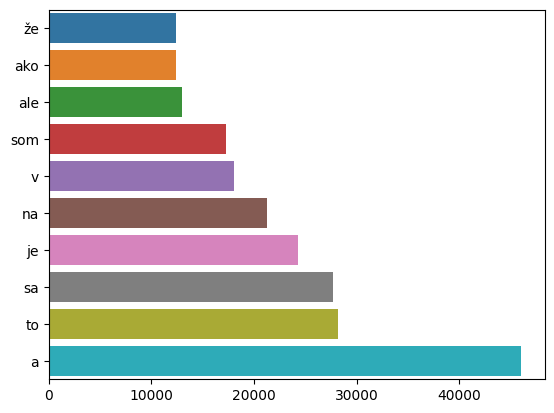

In [67]:
x = np.array([k for k in dic])
y = np.array([dic[k] for k in dic])
arg_s = np.argsort(y)
x = x[arg_s]
y = y[arg_s]
sns.barplot(x=y[-10:],y=x[-10:])

c:\Users\max\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\max\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\max\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\max\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be

<AxesSubplot:>

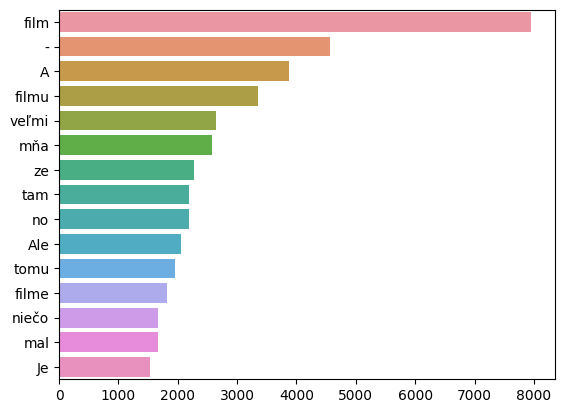

In [72]:
from collections import Counter
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:400]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.barplot(x=y[:15],y=x[:15])

# Vysledky
Stopwords su lebo neni vsetko lowercase, dame to lowercase, dame prec stopwpords a znaky co neni su v abecede, we will see